Hari Kosuru, hk8663
Atreya Misra, am73676

In [27]:
import numpy as np
import pandas as pd
import scipy.linalg as LA
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.image as mpimg
from PIL import Image
from scipy.misc import imread

from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn.linear_model import Ridge

%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

Problem 1: Create a vector in S that is different from v1,v2,v3,v4

Note that S is spans two dimensions, as shown by the two pivots when in upper triangular form. The linearly independent vectors are hence v1 and v2, and a new vector v_new can be constructed by a linear combination of v1 and v2. Here, we choose v1 + v2.# 

In [28]:
v1 = np.array((1,2,3,4))
v2 = np.array((0,1,0,1))
v3 = np.array((1,4,3,6))
v4 = np.array((2,11,6,15))


mat = np.column_stack((v1,v2,v3,v4))
p,l,u = LA.lu(mat)

print 'Upper Triangular Form (Has 2 Pivots):'
print u


v_new = v1 + v2
print '\nNew Vector in S'
print v_new

Upper Triangular Form (Has 2 Pivots):
[[  4.00000000e+00   1.00000000e+00   6.00000000e+00   1.50000000e+01]
 [  0.00000000e+00  -7.50000000e-01  -1.50000000e+00  -5.25000000e+00]
 [  0.00000000e+00   0.00000000e+00   5.55111512e-17   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00  -9.71445147e-17]]

New Vector in S
[1 3 3 5]


Problem 1: Create a number not in S

This can be accomplished if a new vector, v5, produces atleast 3 pivots when in upper triangular form. That is, v5 must be linearly independent, and hence not in  S, if a matrix composed of v1,v2,v3,v5 has 3 pivots (previously S had 2 pivots).

In [29]:
v5 = np.array((1,2,3,5))
mat = np.column_stack((v1,v2,v3,v5))
p,l,u = LA.lu(mat)

print 'Upper Triangular Form (Has 3 Pivots):'
print u

print '\nNew Vector(v5):'
print v5

Upper Triangular Form (Has 3 Pivots):
[[  4.00000000e+00   1.00000000e+00   6.00000000e+00   5.00000000e+00]
 [  0.00000000e+00  -7.50000000e-01  -1.50000000e+00  -7.50000000e-01]
 [  0.00000000e+00   0.00000000e+00   5.55111512e-17  -1.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00  -5.00000000e-01]]

New Vector(v5):
[1 2 3 5]


Problem 1: Part 2

S's dimension is equal to the rank of its matrix, which is also equal to the number of pivots.
As shown earlier, the matrix has two pivots. Hence, S has two dimensions.

In [30]:
mat = np.column_stack((v1,v2,v3,v4))
p,l,u = LA.lu(mat)

print 'Upper Triangular Form (Has 2 Pivots):'
print u

Upper Triangular Form (Has 2 Pivots):
[[  4.00000000e+00   1.00000000e+00   6.00000000e+00   1.50000000e+01]
 [  0.00000000e+00  -7.50000000e-01  -1.50000000e+00  -5.25000000e+00]
 [  0.00000000e+00   0.00000000e+00   5.55111512e-17   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00  -9.71445147e-17]]


Problem 1: Part 3: Find the Orthonormal basis

In [31]:
orthMat = LA.orth(mat)
print orthMat

[[-0.1098991   0.2669373 ]
 [-0.54396107 -0.53613402]
 [-0.32969731  0.80081189]
 [-0.76375927 -0.00225943]]


Problem 1: Part 4: Optimiazation Problem

We first ompute Q, the projection matrix, which is defined for an arbitrary matrix A as A(A^T A)^-1 * A^T * Y, where the *'s represent matrix multiplication. Then we can calculate the projection of Z onto the subspace by applying the transformation.

In [32]:
z = np.array([1,0,0,0])
mat = orthMat
mat = np.array(mat)

middle = np.linalg.inv(np.dot(mat.T, mat))
Q = np.matmul(np.matmul(mat, middle), mat.T)


print 'Projected Vector onto S:'
print np.matmul(Q, z)

Projected Vector onto S:
[ 0.08333333 -0.08333333  0.25        0.08333333]


Problem 2: Part 1

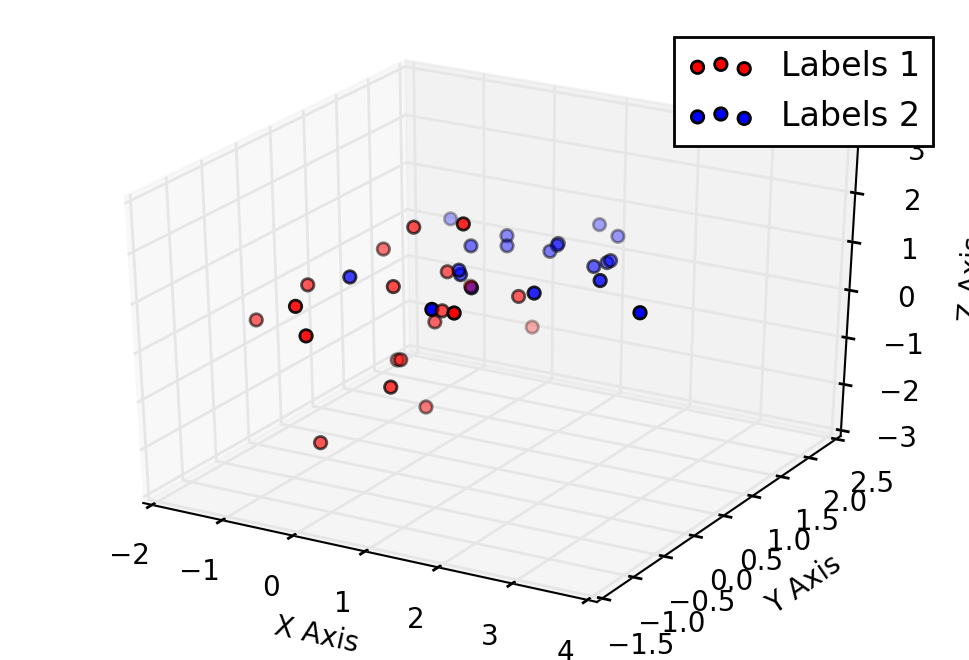

In [33]:
mean1 = [0,0,0]
cov1 = [[.5, 0, 0], [0, .5, 0], [0, 0, .7]]
label1 = np.random.multivariate_normal(mean1, cov1, 20)

mean2 = [1,1,1]
cov2 = [[.5, 0, 0], [0, .5, 0], [0, 0, .01]]
label2 = np.random.multivariate_normal(mean2, cov2, 20)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(label1.T[0], label1.T[1], label1.T[2], c='r', label='Labels 1')
ax.scatter(label2.T[0], label2.T[1], label2.T[2], c='b', label= 'Labels 2')

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

plt.legend()
plt.show()

Problem 2: Part 2:

The spread of the set Label 1 is significantly more in the Z Axis than the set of Label 2. This is reasonable since the covariance matrix of labels 1 has a .7 covariance in Z, whereas the covariance matrix of labels 2 has only .01 in Z. So, Labels 2 are closer to the mean in the Z Axis and have a small spread. Labels 1 are centered around 0 in the Z axis and are not as clustered.

Problem 2: Part 3: Find Covariance Matrix of X:

In [34]:
X = np.concatenate((label1, label2))

x = X.T[0]
y = X.T[1]
z = X.T[2]

meanx = np.mean(x)
meany = np.mean(y)
meanz = np.mean(z)

length = len(x) - 1

covMat = [ [np.sum((x - meanx)**2)/length , np.sum((x - meanx)*(y - meany))/length, np.sum((x - meanx)*(z - meanz))/length ],
        [np.sum((y - meany)*(x - meanx))/length, np.sum((y - meany)**2)/length, np.sum((y - meany)*(z - meanz))/length],
        [np.sum((z - meanz)*(x - meanx))/length, np.sum((z - meanz)*(y - meany))/length, np.sum((z - meanz)**2)/length] ]

print 'Calculated Covariance:' + str(covMat)

print 'Actual Coviariance: \n' + str(np.cov(X.T))

Calculated Covariance:[[0.90083828569995117, 0.27542477665762871, 0.23163657480573432], [0.27542477665762871, 0.60068936497499947, 0.18427838282285633], [0.23163657480573432, 0.18427838282285633, 0.69192203009478559]]
Actual Coviariance: 
[[ 0.90083829  0.27542478  0.23163657]
 [ 0.27542478  0.60068936  0.18427838]
 [ 0.23163657  0.18427838  0.69192203]]


Problem 2 Part 4:

We manually select the largest eigen vectors/values. By inspection, Labels 1 have a mean of 0, and Labels 2 have a mean of 1, as expected. There is no obvious form of clustering, but Labels 1 tend to be on the lower left side, whereas Labels 2 tend to be on the upper right side.

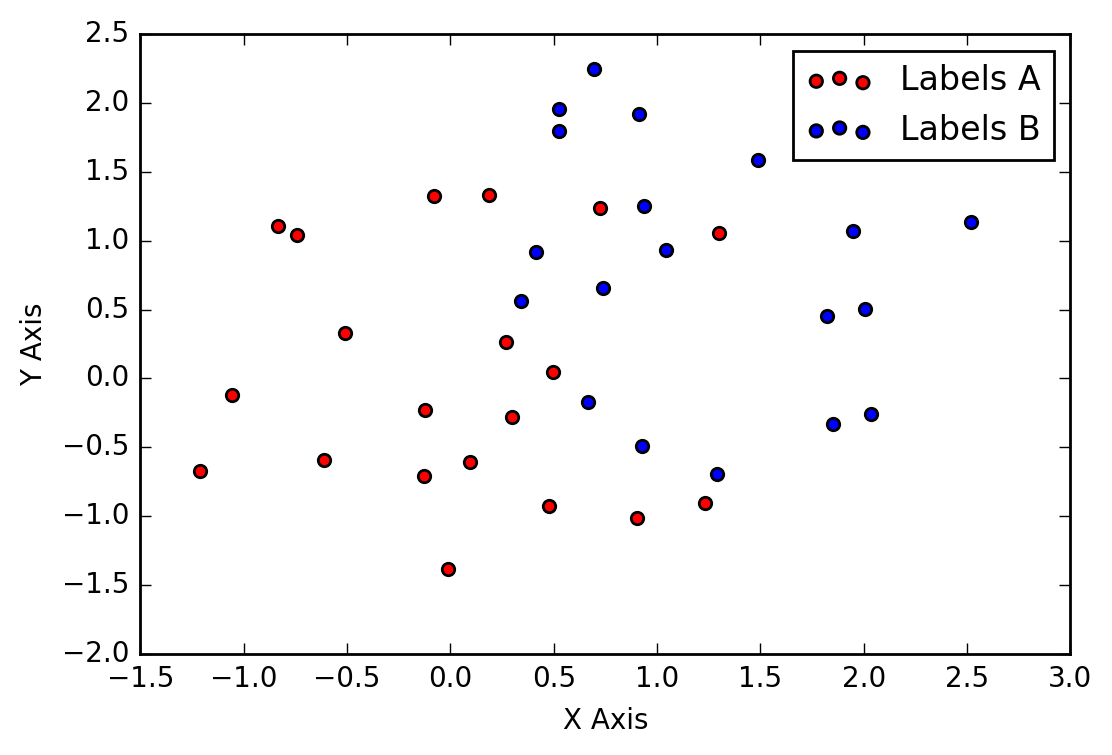

In [35]:
cov1 = [[.5, 0, 0], [0, .5, 0], [0, 0, .7]]
cov2 = [[.5, 0, 0], [0, .5, 0], [0, 0, .01]]

cova = [[.5,0],[0,0.7]]
meana = [0,0]
covb = [[.5,0],[0,0.5]]
meanb = [1,1]
labela = np.random.multivariate_normal(meana, cova, 20)
labelb = np.random.multivariate_normal(meanb, covb, 20)
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(labela.T[0], labela.T[1], c='r', label='Labels 1')
ax.scatter(labelb.T[0], labelb.T[1], c='b', label= 'Labels 2')

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')

plt.legend()
plt.show()


Problem 3 Part 1

In [36]:
def lowRankApproximation(rank):
    im = imread('mona_lisa.png',flatten=True)
    
    u,s,v = np.linalg.svd(im, full_matrices='true');

    rank2 = s[:]
    rank2[rank:] = 0

    result = np.diag(rank2)
    S = np.zeros(im.shape)
    S[:400, :400] = result
    rank2_approx = np.matmul(np.matmul(u,  S), v)
    plt.imshow(rank2_approx, cmap='Greys_r')


Rank = 2

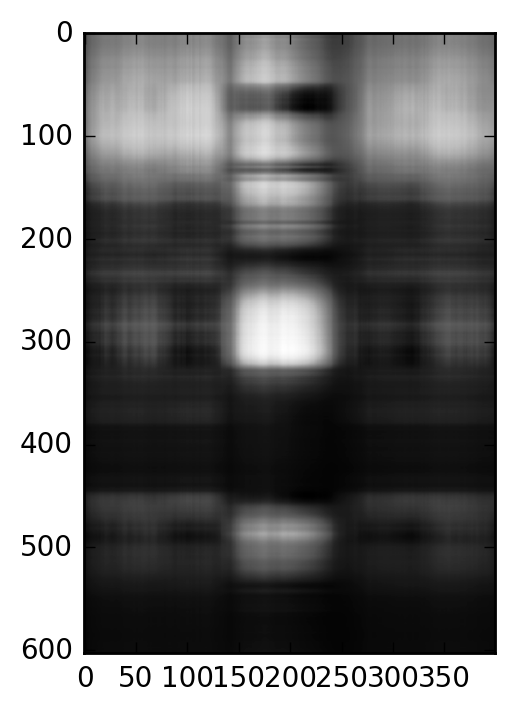

In [37]:
lowRankApproximation(2)    
plt.show()

Rank = 5

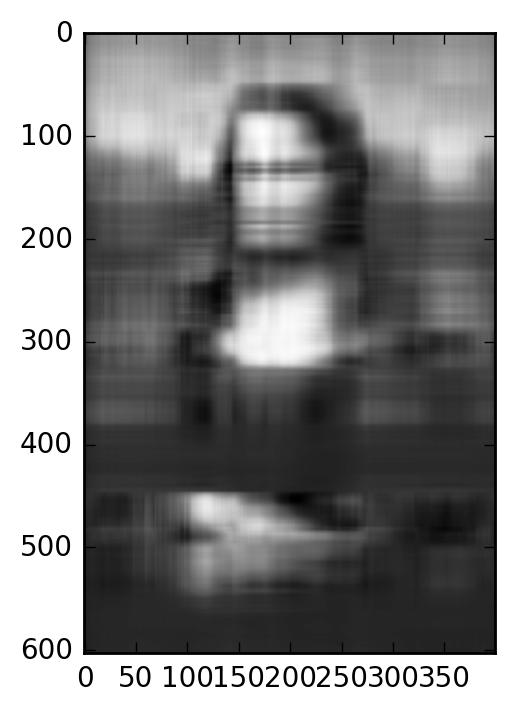

In [38]:
lowRankApproximation(5)    
plt.show()

Rank = 10

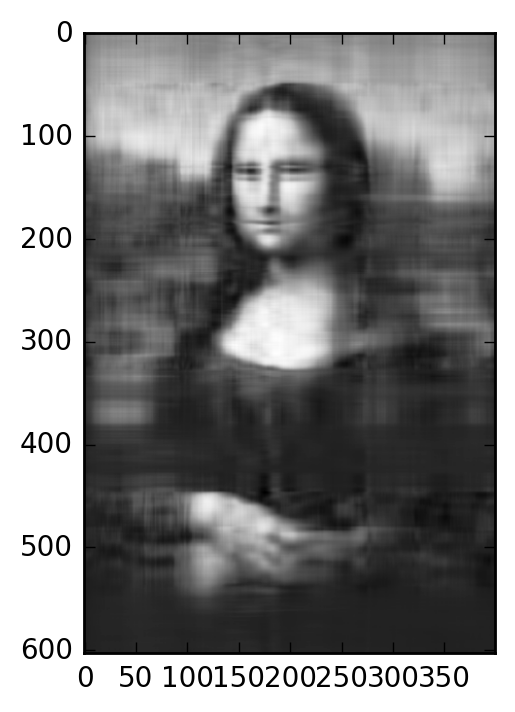

In [39]:
lowRankApproximation(10)    
plt.show()

Rank = 20

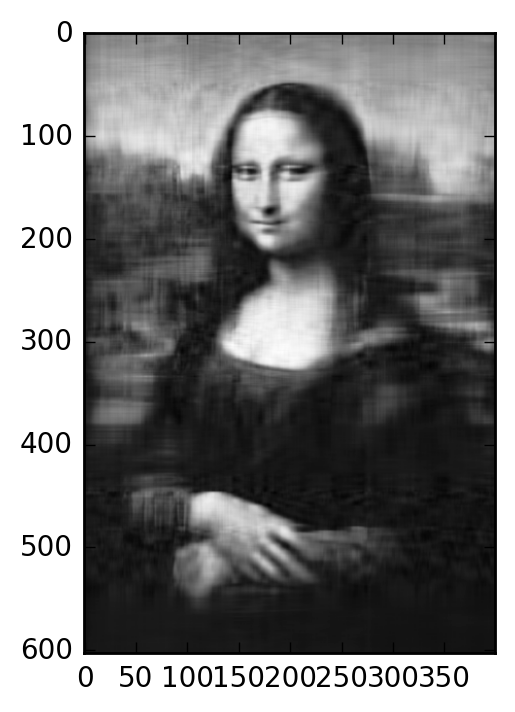

In [40]:
lowRankApproximation(20)    
plt.show()

Problem 3: Part 2:

Formula for calculating number of pixels at an arbitrary rank, K, for an arbitrary image, M x N dimensions :
    [(M * K) + K + (N * K)] * 16
Note that this assumes the image is stored in U,S,V form, where U,S,V are the outputs from SVD, and the diagonal matrix S is represented as a 1D array.

The Mona Lisa is 603 x 400 Pixels, M = 603, N = 400
For Rank 2:
   ( 603 * 2 + 2 + 400 * 2 ) * 16  = 32,128 bits
For Rank 5:
   ( 603 * 5 + 5 + 400 * 5 ) * 16  = 80,320 bits
For Rank 10:
   ( 603 * 10 + 10 + 400 * 10 ) * 16  = 160,640 bits


Problem 4: Part 1:

Kaggle Username: Hari96k

Problem 4: Part 2:

In [41]:


train = pd.read_csv("input/train.csv")
test = pd.read_csv("input/test.csv")

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [42]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

Data Preprocessing

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000126370F0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000BED2048>]], dtype=object)

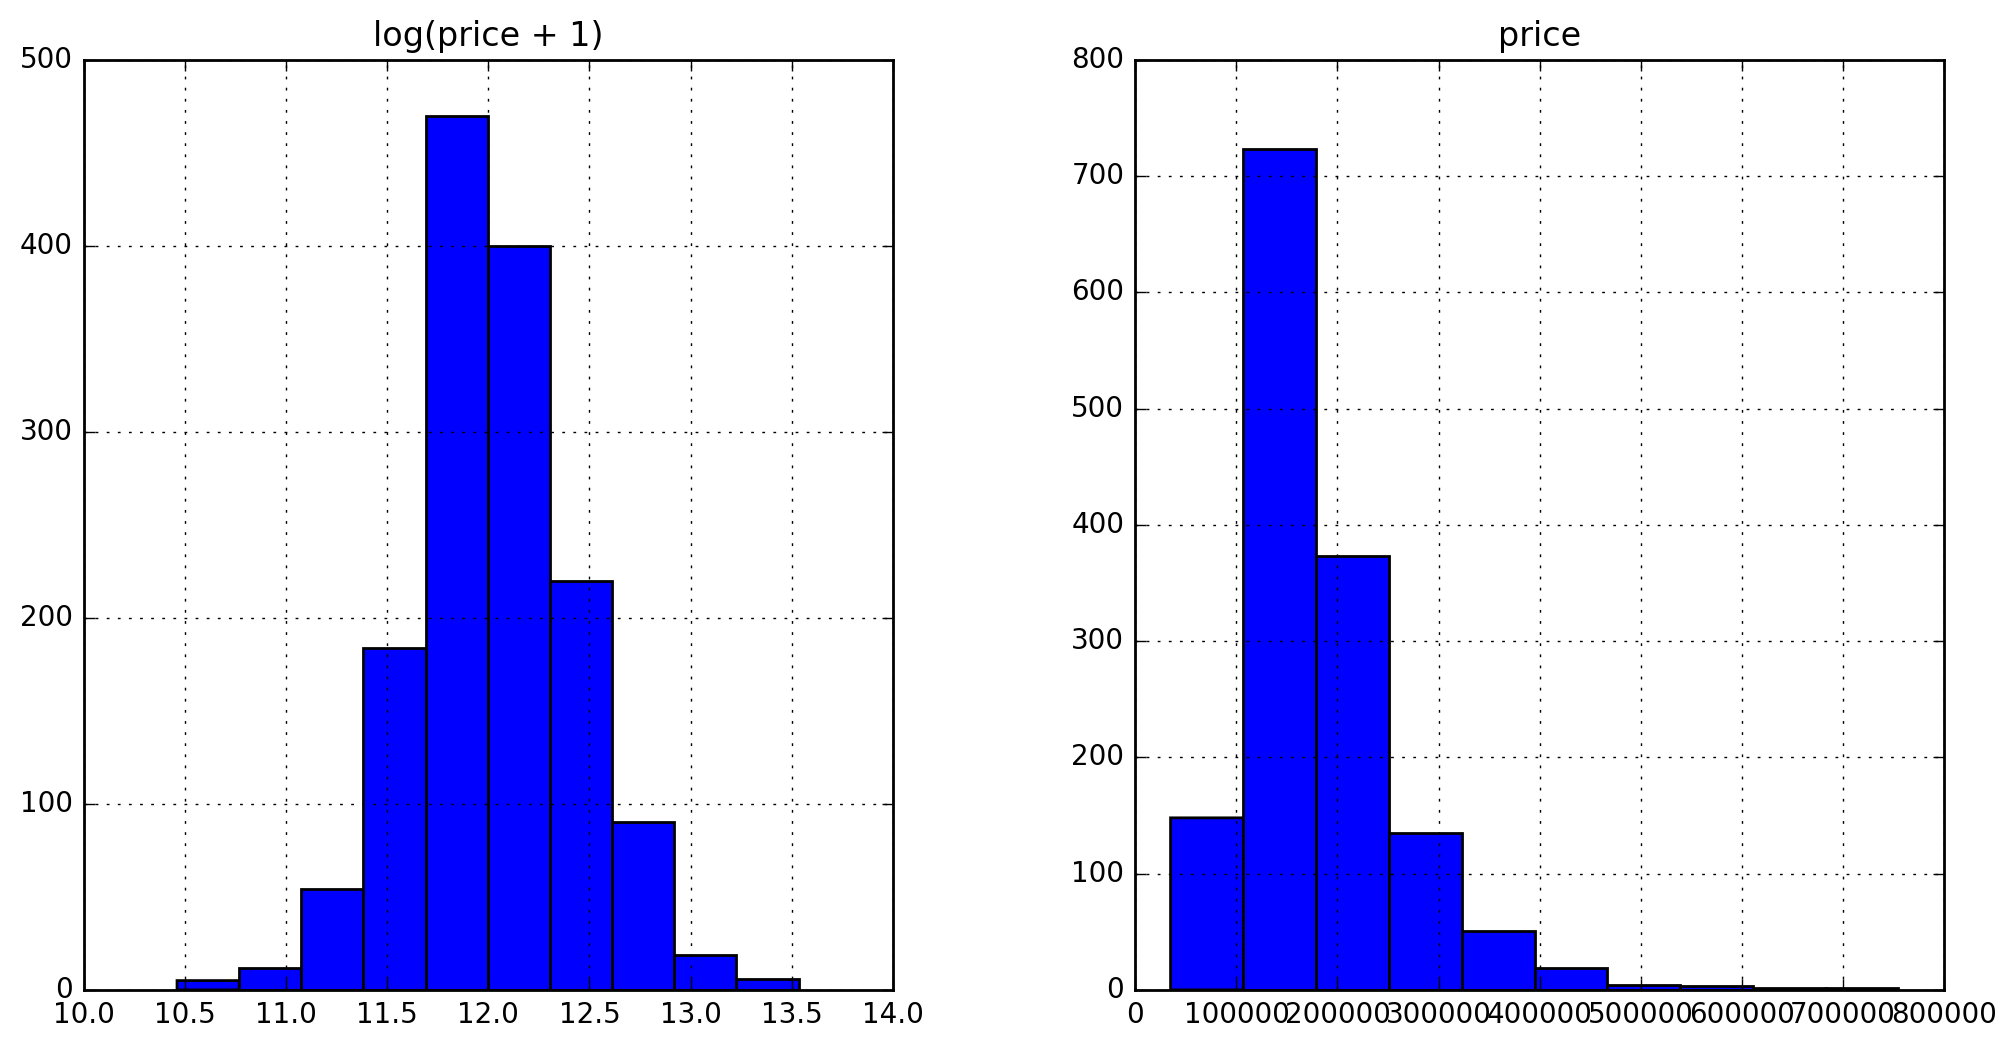

In [43]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()

In [44]:
#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [45]:
all_data = pd.get_dummies(all_data)

In [46]:
#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

In [47]:
#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

Ridge Model

Alpha = .1 resulted with a submission score of .13029

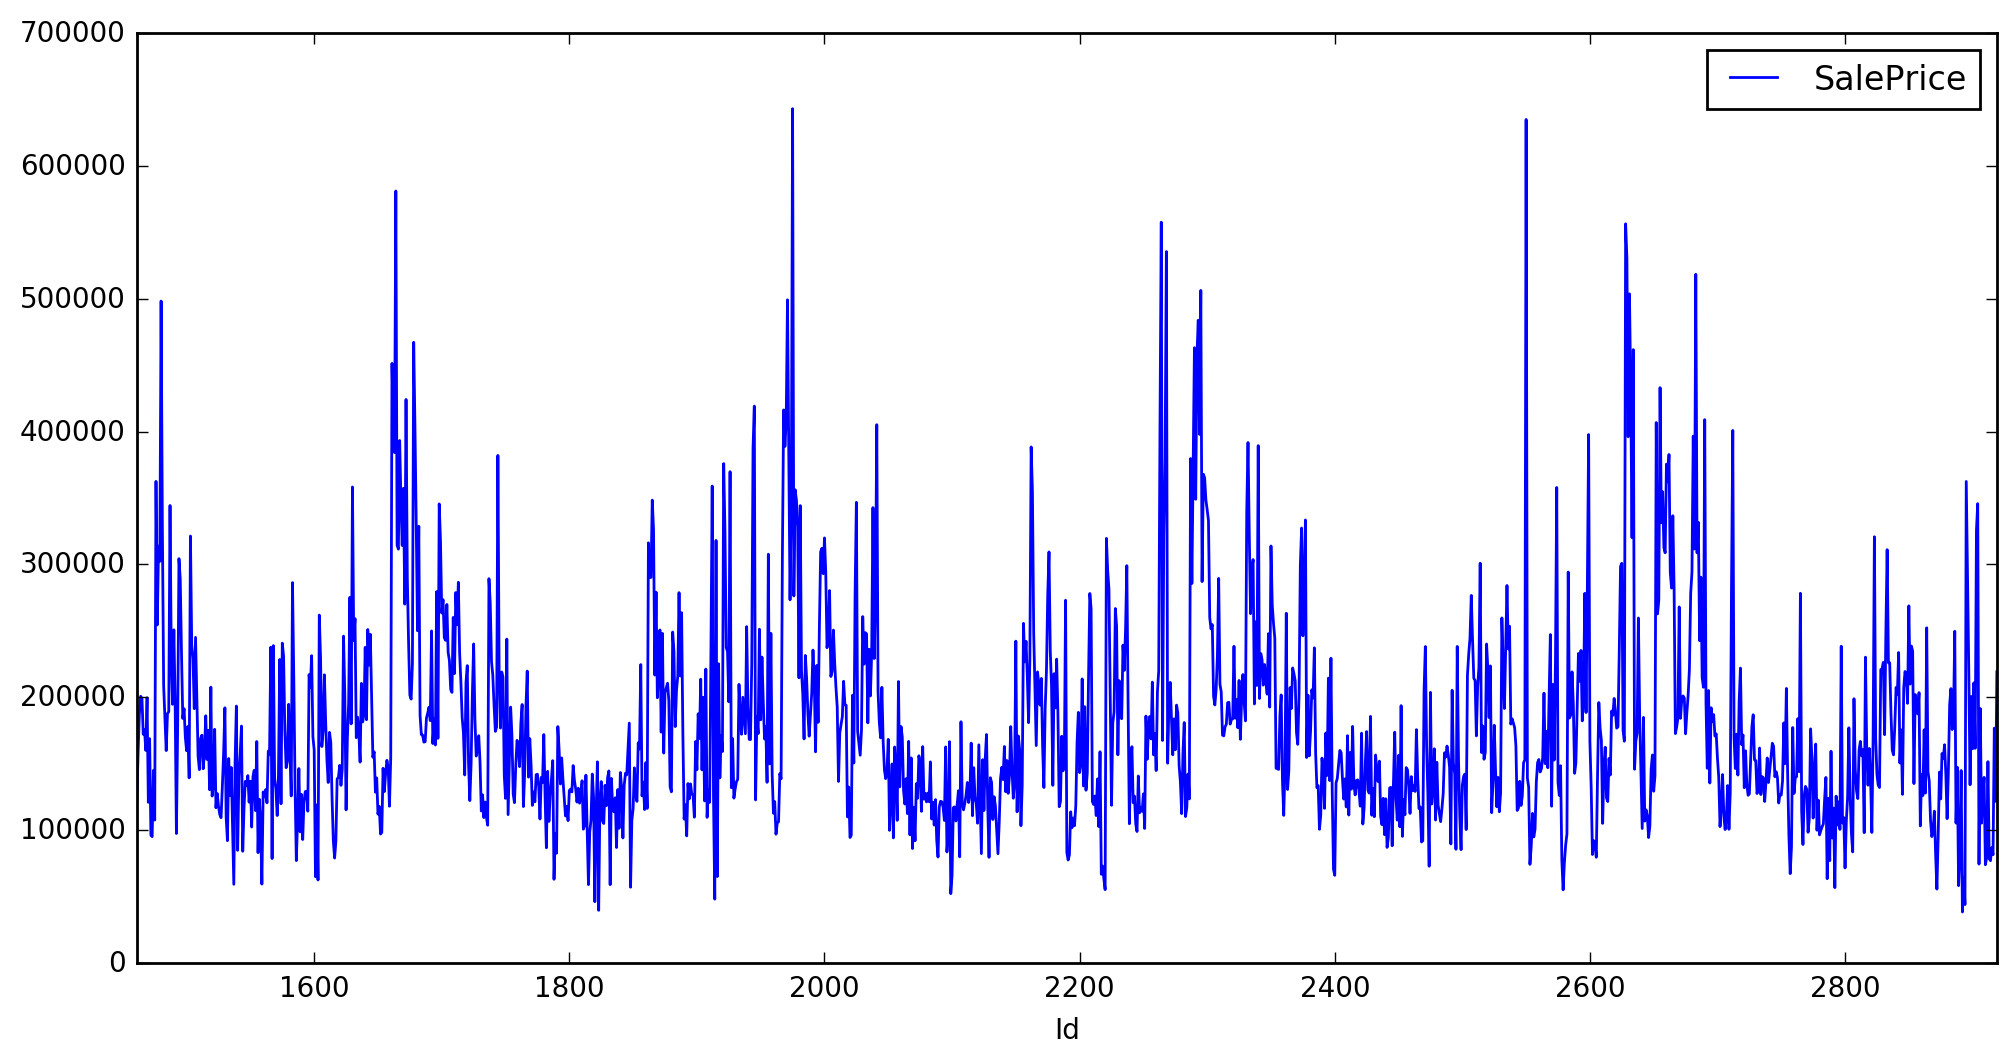

In [48]:
a = .1

clf = Ridge(alpha=a)
clf.fit(X_train, y)
predict = np.expm1(clf.predict(X_test))

results = pd.DataFrame({"Id":test.Id, "SalePrice":predict})
results.to_csv("results.csv", index = False)

results.plot(x='Id', y='SalePrice', kind='line')
plt.show()


Problem 4: Part 3: Our model

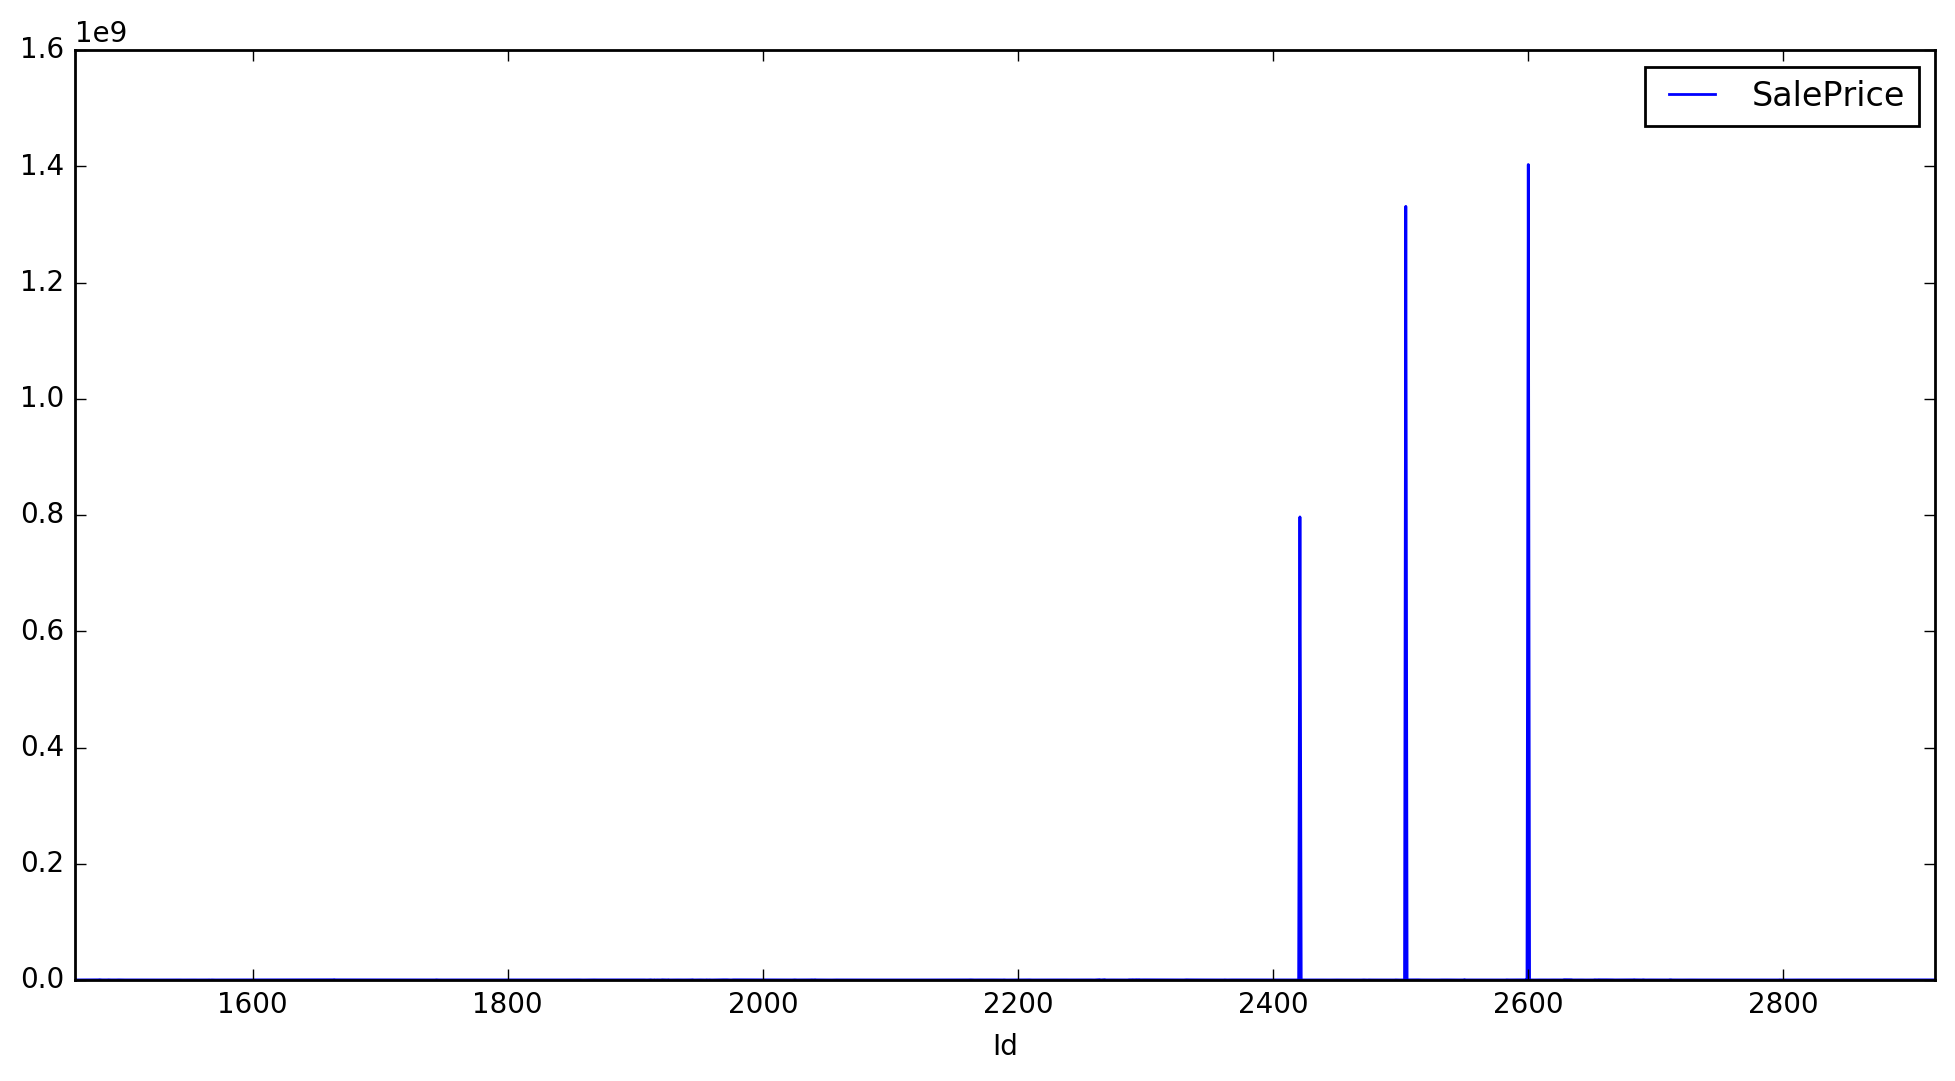

In [49]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression().fit(X_train, y)
preds = np.expm1(LR.predict(X_test))

results = pd.DataFrame({"Id":test.Id, "SalePrice":preds})
results.to_csv("LinearRegressionSolution.csv", index = False)

results.plot(x='Id', y='SalePrice', kind='line')
plt.show()

#Didn't bother submitting, this one looks terrible

Ridge with alpha .001, Submission Score: .16461

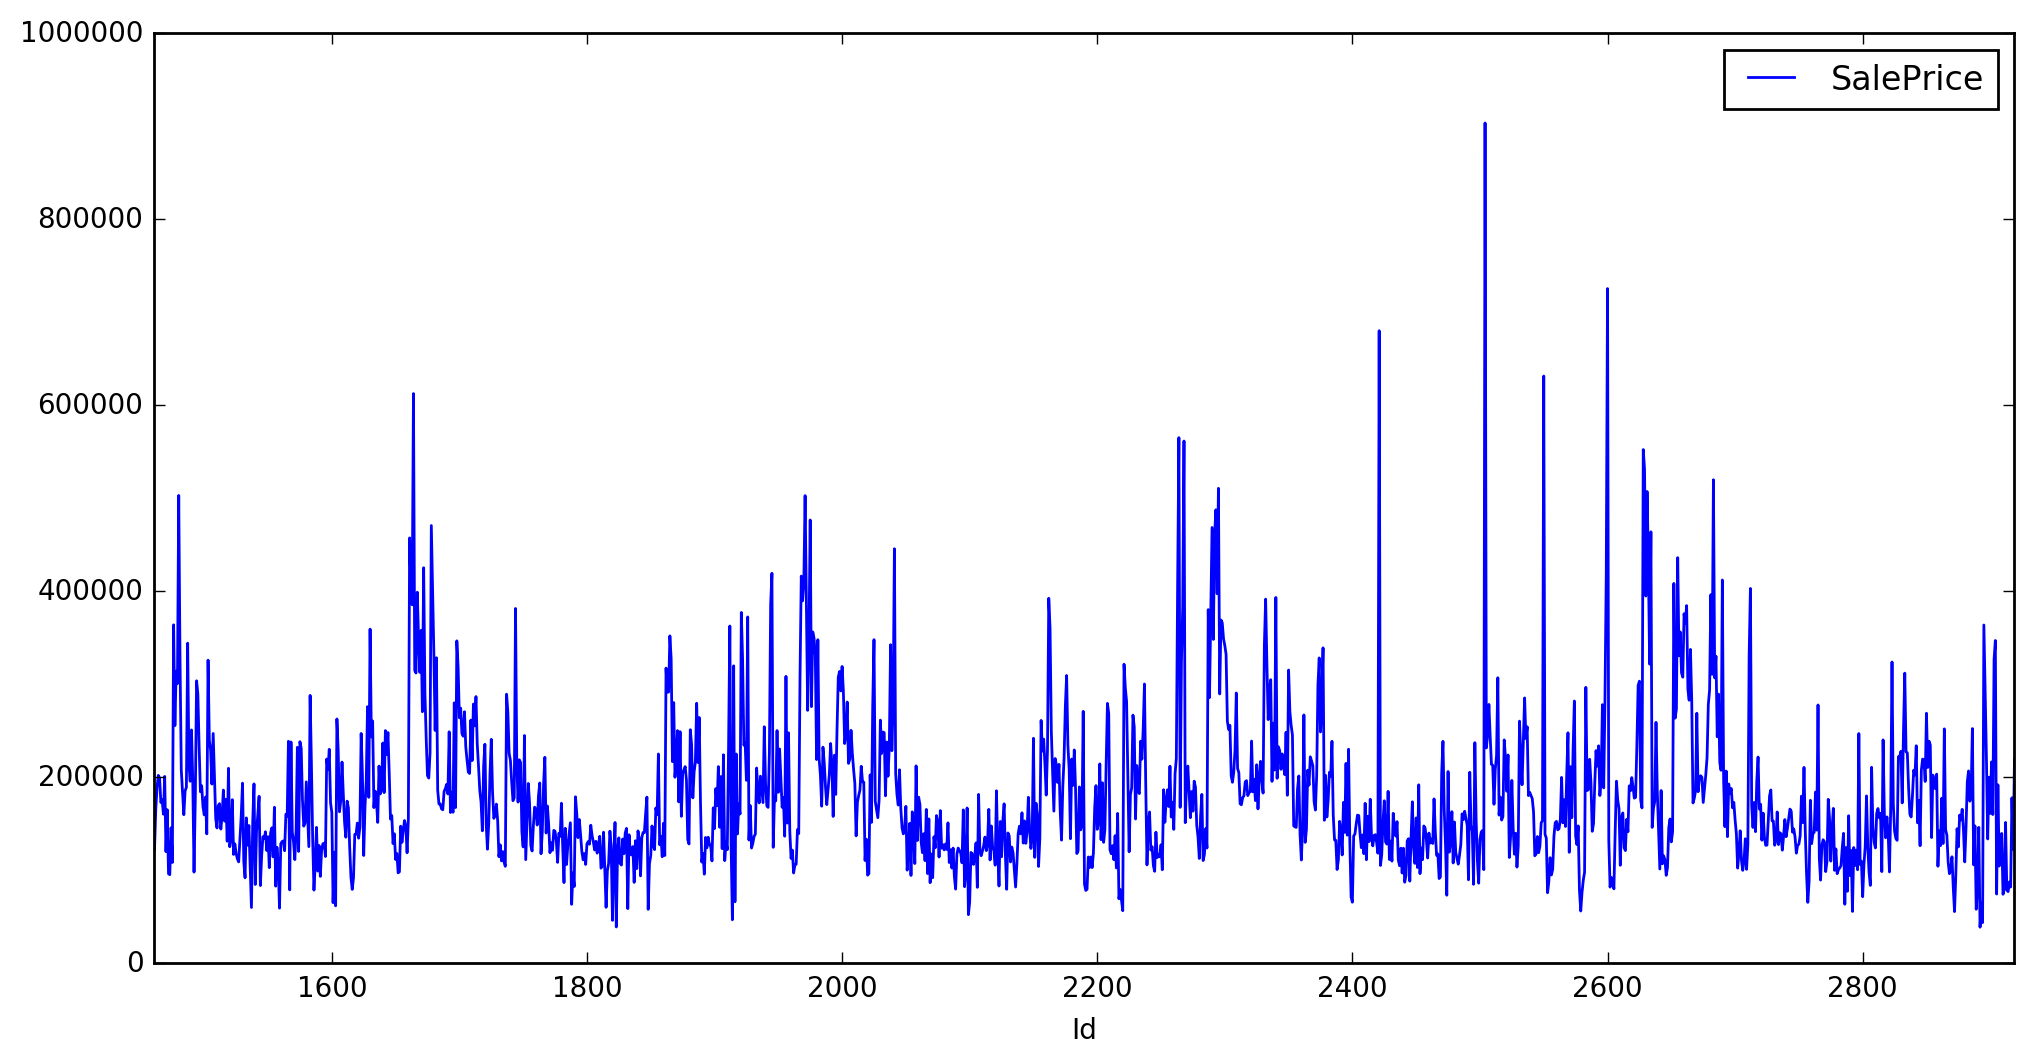

In [50]:
a = .001

clf = Ridge(alpha=a)
clf.fit(X_train, y)
predict = np.expm1(clf.predict(X_test))

results = pd.DataFrame({"Id":test.Id, "SalePrice":predict})
results.to_csv("improvedRidge.csv", index = False)

results.plot(x='Id', y='SalePrice', kind='line')
plt.show()

#Submission Score .16461

RidgeCV Model, Submission Score: .12224

    This is our best RMSE score

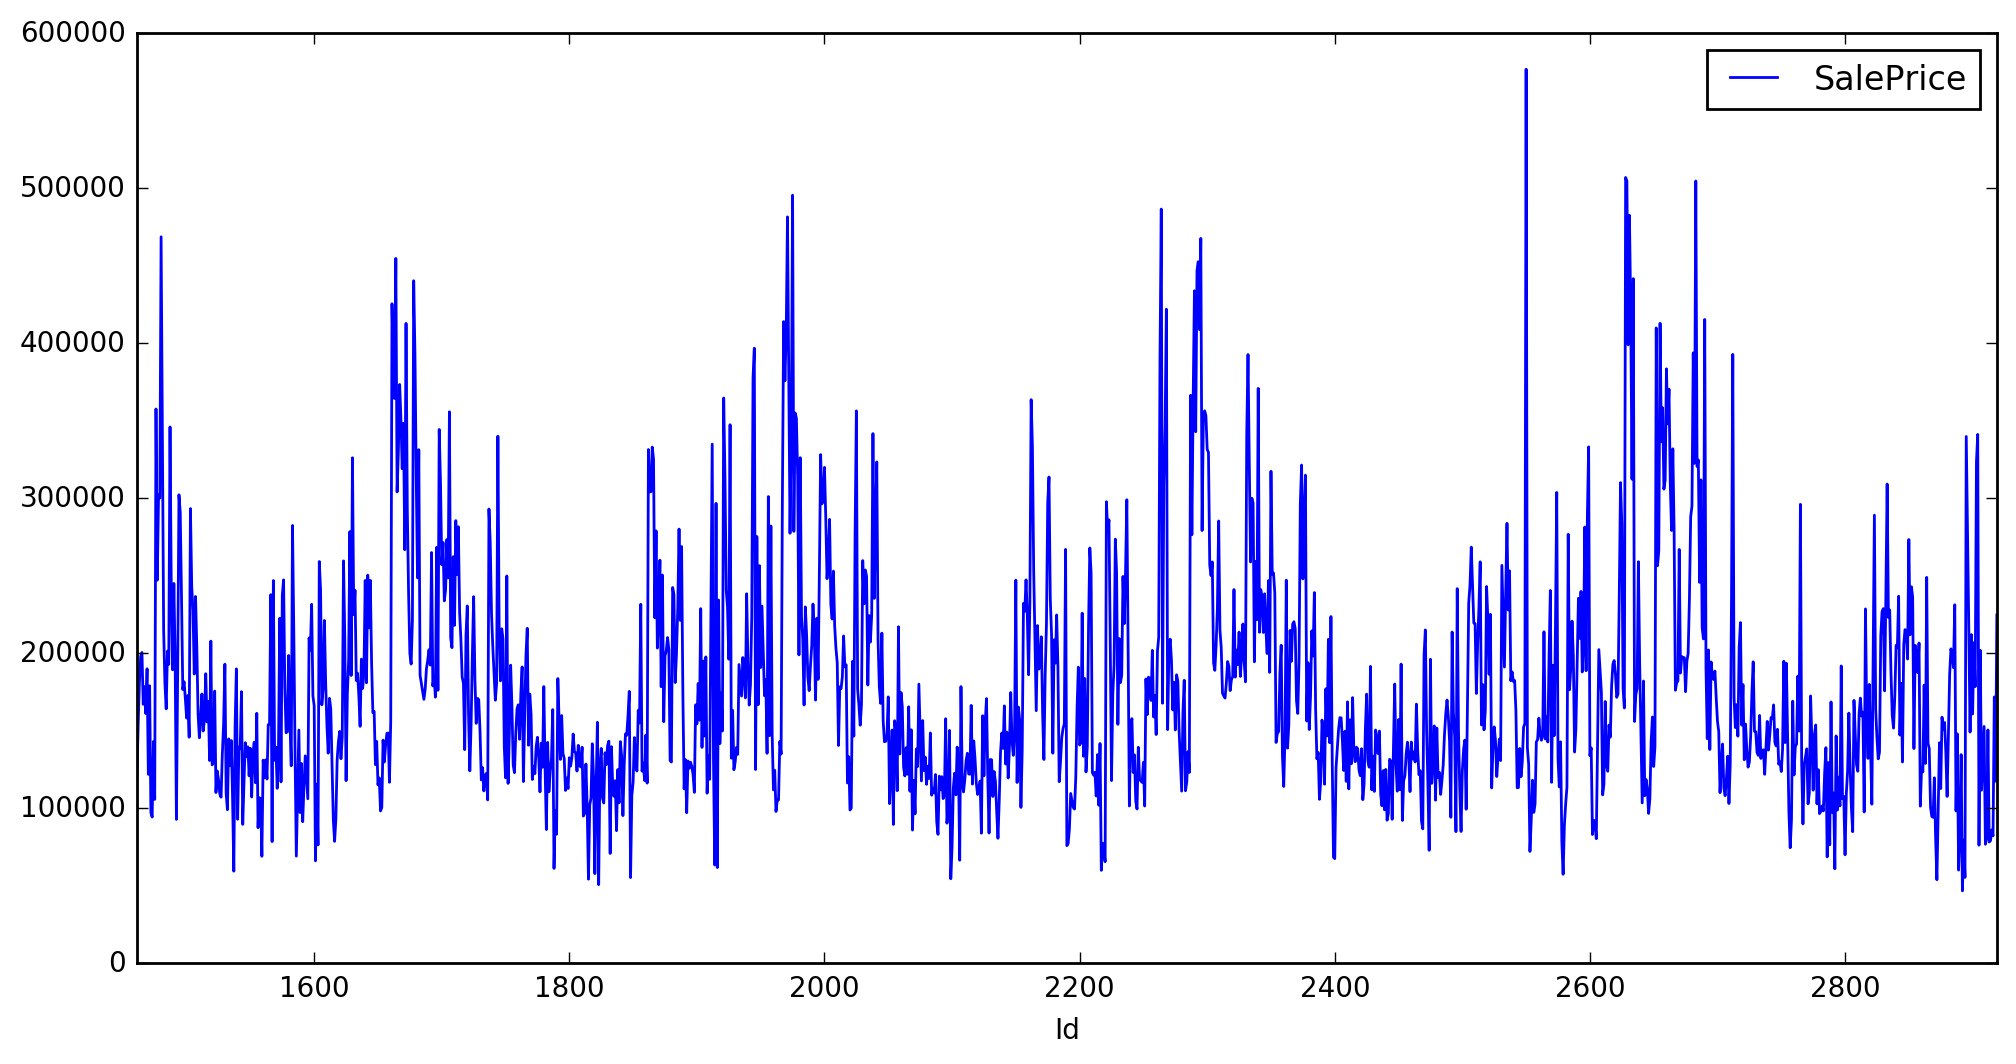

In [51]:
from sklearn.linear_model import RidgeCV

model = RidgeCV().fit(X_train, y)
preds = np.expm1(model.predict(X_test))

results = pd.DataFrame({"Id":test.Id, "SalePrice":preds})
results.to_csv("improvedRidge.csv", index = False)

results.plot(x='Id', y='SalePrice', kind='line')
plt.show()

#Submission Score .12224